## Breast Cancer Detection using Linear Regression Algorithm

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from IPython.display import display

In [3]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [4]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
data_frame=pd.DataFrame(breast_cancer_dataset.data,columns = breast_cancer_dataset.feature_names)

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
 data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
data_frame['label']=breast_cancer_dataset.target

In [9]:
data_frame.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [10]:
data_frame.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [11]:
data_frame.shape

(569, 31)

In [12]:
 data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [13]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
py1=data_frame['label'].value_counts()
print(py1)

1    357
0    212
Name: label, dtype: int64


In [15]:
# 1= benign
# 0= Malgnant

In [18]:
df3=data_frame.groupby('label').std()
# display(df3.T)
df4=df3.T
df4.rename(columns={"label":"FEATURES", 0: "BENIGN",1: "MALIGNANT"})


label,BENIGN,MALIGNANT
mean radius,3.203971,1.780512
mean texture,3.779470,3.995125
mean perimeter,21.854653,11.807438
mean area,367.937978,134.287118
mean smoothness,0.012608,0.013446
mean compactness,0.053987,0.033750
mean concavity,0.075019,0.043442
mean concave points,0.034374,0.015909
mean symmetry,0.027638,0.024807
mean fractal dimension,0.007573,0.006747


In [87]:
# display(df4)
df4.style

label,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


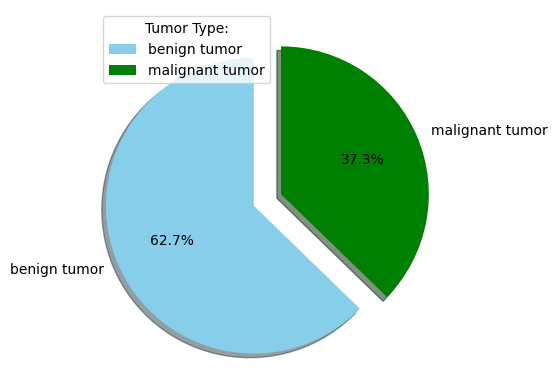

In [100]:
mylabels = ["benign tumor", "malignant tumor"]
mycolors = ["skyblue", "green"]
myexplode = [0.2, 0, ]
py.pie(py1,labels = mylabels,startangle = 90,autopct='%1.1f%%',colors = mycolors,explode = myexplode,shadow='True')
py.legend(title = "Tumor Type:")
py.show()

In [101]:
data_frame['label']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [102]:
x=data_frame.drop(columns='label',axis=1)
y=data_frame['label']

In [103]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [104]:
sns.lmplot(x='features',y='labels',data=data_frame,aspect=2,height=6)
# plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
# plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

KeyError: "None of [Index(['features', 'labels'], dtype='object')] are in the [columns]"

### Linear Regression Model

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [106]:
print(x.shape,x_test.shape,x_train.shape)

(569, 30) (114, 30) (455, 30)


In [107]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [108]:
x_train=scaler.fit_transform(x_train)

In [109]:
x_test=scaler.transform(x_test)

In [110]:
scaler.inverse_transform(x_train)

array([[1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
        8.321e-02],
       [1.113e+01, 1.662e+01, 7.047e+01, ..., 4.044e-02, 2.383e-01,
        7.083e-02],
       [1.918e+01, 2.249e+01, 1.275e+02, ..., 1.708e-01, 3.193e-01,
        9.221e-02],
       ...,
       [1.246e+01, 1.283e+01, 7.883e+01, ..., 2.680e-02, 2.280e-01,
        7.028e-02],
       [1.234e+01, 1.227e+01, 7.894e+01, ..., 1.070e-01, 3.110e-01,
        7.592e-02],
       [1.747e+01, 2.468e+01, 1.161e+02, ..., 1.721e-01, 2.160e-01,
        9.300e-02]])

In [111]:
# cross validation 
from sklearn.model_selection import cross_val_score

In [112]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [113]:
mse=cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [114]:
np.mean(mse)

-0.06008416842841554

In [115]:
reg_pred=regression.predict(x_test)

In [116]:
reg_pred

array([ 0.61431192,  0.66543239,  0.97370453, -0.65992409,  0.65163453,
        0.03040248,  0.88876745,  1.05271995,  0.8451463 ,  0.87997887,
        0.29861825,  0.68118114,  0.6457124 ,  0.62149707,  0.83053321,
        0.22678419,  0.92242544,  1.13664657,  0.69019262, -0.19130733,
        1.0259028 ,  1.08628763,  0.91111944,  1.17512021,  0.704885  ,
        0.0199071 ,  0.99037245,  0.89822406,  0.23932985,  0.23264517,
        0.6731214 ,  0.78275874,  0.95402536,  0.23852974, -0.01909606,
        0.90636447,  1.02913337,  0.68172377,  1.14154066,  1.02255202,
       -0.76981635,  0.39713545,  1.10965837,  0.95841553,  0.27657039,
        0.90276819,  1.18619887,  0.94563173,  0.46643348,  0.13955218,
        0.92913394,  0.59856925,  0.61032395,  0.91869059,  1.08162225,
        0.48362904,  0.89707362,  1.08683604, -0.27812397,  0.94568483,
        0.61687477,  0.25183569,  1.04620682, -0.21861861,  0.30079459,
        0.87948804, -0.04000778,  0.3220109 ,  0.75702899,  0.37

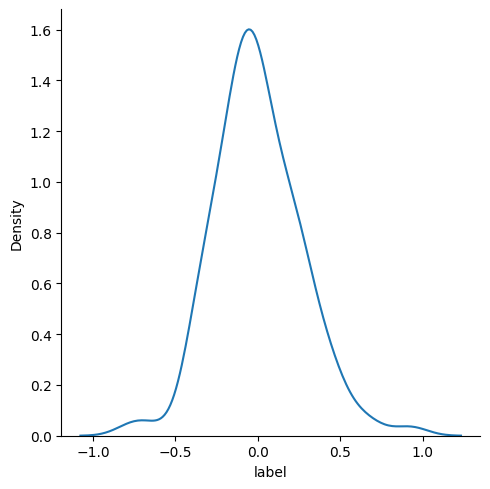

In [117]:
sns.displot(reg_pred-y_test,kind="kde")

In [118]:
from sklearn.metrics import r2_score

In [119]:
score=r2_score(reg_pred,y_test)

In [121]:
score=score*100

In [122]:
score

66.59849841427334